### #task1 - Prediction using Supervised ML under **Data Science & Business Analytics Tasks (MAY 2021)**

#### Problem Statement - What will be predicted score if a student studies for 9.25 hrs/ day?

## By Abhishek Polekar

#### Importing Libraries

In [100]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [101]:
# dataset 
url = "http://bit.ly/w-data"
dataframe = pd.read_csv(url)
print("Data imported successfully")
dataframe.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Structure of DataFrame

In [102]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Describing data

In [103]:
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting data

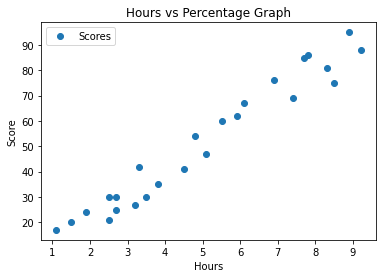

In [106]:
dataframe.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Graph')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

### Preparing data for training, testing and spliting

In [78]:
X = (dataframe['Hours'].values).reshape(-1,1)
y = (dataframe['Scores'].values)    

### Spliting data using sklearn.model_selection

In [68]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [108]:
# print('X train')
# print(X_train)

# print('Y train')
# print(y_train)

### **Training**

In [70]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training Model complete")

Training Model complete


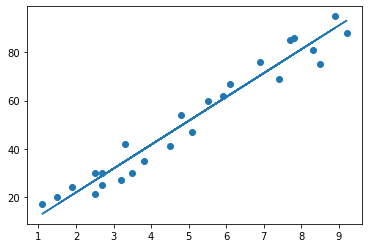

In [71]:
# Regression line formula
# Line = ((Slop Of line) * explanatory variable) + intercept
line = reg.coef_ * X + reg.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**


In [83]:
print(X_test) 
y_pred = reg.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual Vs. Predicted data

In [99]:
comp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Problem Statement - What will be predicted score if a student studies for 9.25 hrs/ day?

In [90]:
hours = 9.25
pred = reg.predict([[hours]])
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Hours = 9.25
Predicted Score = 93.69173248737538


### **Mean Absolute Error**

To evaluate the performance of algorithm

In [109]:
from sklearn import metrics  
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:  4.183859899002975
